# EAS Data Mining

In [36]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from scipy import stats
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import StratifiedKFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [37]:
df = pd.read_csv("hmeq.csv")
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [38]:
#cek total data
df.count().sort_values()

DEBTINC    4693
DEROG      5252
DELINQ     5380
MORTDUE    5442
YOJ        5445
NINQ       5450
CLAGE      5652
JOB        5681
REASON     5708
CLNO       5738
VALUE      5848
BAD        5960
LOAN       5960
dtype: int64

In [39]:
#cek missing
a=np.sum(df.isnull())
a=pd.DataFrame(a,columns=['a'])
b=pd.DataFrame([])
a=a.values
b['Variabel']=list(df)
b['Jumlah Missing']=a
b

,Variabel,Jumlah Missing
0,BAD,0
1,LOAN,0
2,MORTDUE,518
3,VALUE,112
4,REASON,252
5,JOB,279
6,YOJ,515
7,DEROG,708
8,DELINQ,580
9,CLAGE,308


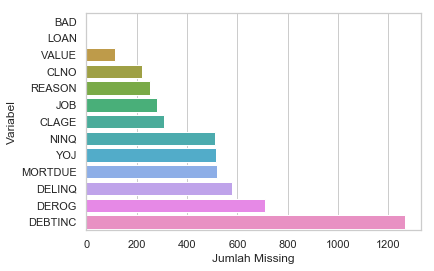

In [40]:
sns.set(style="whitegrid")
bb=b.sort_values('Jumlah Missing')
ax = sns.barplot(x="Jumlah Missing", y="Variabel", data=bb)
plt.show()

In [41]:
#imputasi missing value pada data kategorik
df['REASON'].fillna((df.REASON.mode())[0], inplace=True)
df['JOB'].fillna((df.JOB.mode())[0], inplace=True)

In [42]:
#imputasi mean
df['DEBTINC'] = df.groupby('BAD')['DEBTINC'].transform(lambda x: x.fillna(x.mean()))
df['DEROG'] = df.groupby('BAD')['DEROG'].transform(lambda x: x.fillna(x.mean()))
df['DELINQ'] = df.groupby('BAD')['DELINQ'].transform(lambda x: x.fillna(x.mean()))
df['MORTDUE'] = df.groupby('BAD')['MORTDUE'].transform(lambda x: x.fillna(x.mean()))
df['YOJ'] = df.groupby('BAD')['YOJ'].transform(lambda x: x.fillna(x.mean()))
df['NINQ'] = df.groupby('BAD')['NINQ'].transform(lambda x: x.fillna(x.mean()))
df['CLAGE'] = df.groupby('BAD')['CLAGE'].transform(lambda x: x.fillna(x.mean()))
df['CLNO'] = df.groupby('BAD')['CLNO'].transform(lambda x: x.fillna(x.mean()))
df['VALUE'] = df.groupby('BAD')['VALUE'].transform(lambda x: x.fillna(x.mean()))

print(df.shape)
df.head()

(5960, 13)


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.000000,39025.000000,HomeImp,Other,10.500000,0.000000,0.000000,94.366667,1.000000,9.000000,39.387645
1,1,1300,70053.000000,68400.000000,HomeImp,Other,7.000000,0.000000,2.000000,121.833333,0.000000,14.000000,39.387645
2,1,1500,13500.000000,16700.000000,HomeImp,Other,4.000000,0.000000,0.000000,149.466667,1.000000,10.000000,39.387645
3,1,1500,69460.452973,98172.846227,DebtCon,Other,8.027802,0.707804,1.229185,150.190183,1.782765,21.211268,39.387645
4,0,1700,97800.000000,112000.000000,HomeImp,Office,3.000000,0.000000,0.000000,93.333333,0.000000,14.000000,33.253129


In [43]:
np.sum(df.isnull())

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

# Outlier

In [44]:
from scipy import stats
z = np.abs(stats.zscore(df._get_numeric_data()))
print(z)
df= df[(z < 3).all(axis=1)]
print(df.shape)

[[2.00315143 1.5622993  1.12747705 ... 0.11021105 1.23608933 0.62400073]
 [2.00315143 1.54445258 0.08721664 ... 0.71452213 0.7334479  0.62400073]
 [2.00315143 1.52660585 1.41841948 ... 0.11021105 1.13556104 0.62400073]
 ...
 [0.49921338 6.29918148 0.46402945 ... 0.71452213 0.63291961 0.13719023]
 [0.49921338 6.35272165 0.55053539 ... 0.71452213 0.53239133 0.0172893 ]
 [0.49921338 6.36164501 0.58723274 ... 0.71452213 0.53239133 0.01201762]]
(5243, 13)


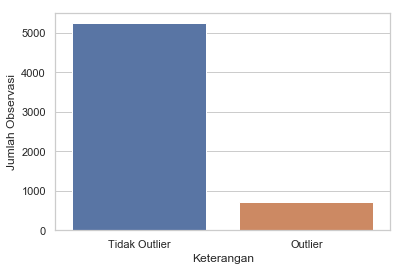

In [45]:
sns.set(style="whitegrid")
c=pd.DataFrame([])
c['Keterangan']=["Tidak Outlier","Outlier"]
c['Jumlah Observasi']=[5243,717]
bx = sns.barplot(x="Keterangan", y="Jumlah Observasi",data=c)
plt.show()

# Transformasi Data Variabel Kategorik

In [46]:
pre=preprocessing.LabelEncoder()
aa=pre.fit(df.iloc[0:,4])
a=pre.transform(df.iloc[0:,4])
bb=pre.fit(df.iloc[0:,5])
b=pre.transform(df.iloc[0:,5])

df['REASON']=a
df['JOB']=b
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.000000,39025.000000,1,2,10.500000,0.000000,0.000000,94.366667,1.000000,9.000000,39.387645
1,1,1300,70053.000000,68400.000000,1,2,7.000000,0.000000,2.000000,121.833333,0.000000,14.000000,39.387645
2,1,1500,13500.000000,16700.000000,1,2,4.000000,0.000000,0.000000,149.466667,1.000000,10.000000,39.387645
3,1,1500,69460.452973,98172.846227,0,2,8.027802,0.707804,1.229185,150.190183,1.782765,21.211268,39.387645
4,0,1700,97800.000000,112000.000000,1,1,3.000000,0.000000,0.000000,93.333333,0.000000,14.000000,33.253129


In [47]:
categorical_columns = ['REASON', 'JOB']
for col in categorical_columns:
    print(np.unique(df[col]))

[0 1]
[0 1 2 3 4 5]


# Transformasi Variabel Count

In [48]:
aa = df.drop(columns=['REASON','JOB'])
bb=df[['REASON','JOB']]
scaler = preprocessing.MinMaxScaler()
scaler.fit(aa)
aa = pd.DataFrame(scaler.transform(aa), index=aa.index, columns=aa.columns)
df=pd.concat([aa,bb],axis=1)
df.head()
print(df.shape)
df.head()

(5243, 13)


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON,JOB
0,1.0,0.000000,0.119783,0.117663,0.350000,0.000000,0.000000,0.219597,0.166667,0.176471,0.598480,1,2
1,1.0,0.003914,0.342229,0.229069,0.233333,0.000000,0.666667,0.283859,0.000000,0.274510,0.598480,1,2
2,1.0,0.007828,0.057568,0.032995,0.133333,0.000000,0.000000,0.348511,0.166667,0.196078,0.598480,1,2
3,1.0,0.007828,0.339247,0.341984,0.267593,0.353902,0.409728,0.350204,0.297127,0.415907,0.598480,0,2
4,0.0,0.011742,0.481894,0.394423,0.100000,0.000000,0.000000,0.217180,0.000000,0.274510,0.466105,1,1


# Feature Selection

In [49]:
X = df.drop(columns=['BAD'])
y = df[['BAD']]
selector = SelectKBest(chi2, k='all').fit(X,y)
X_new = selector.transform(X)
scores = selector.scores_

In [50]:
scores

array([  5.78577142,   2.9811862 ,   3.8520815 ,   4.35548894,
       129.43947155, 192.96654998,  16.38507743,  29.80597652,
         1.49792281,  18.67644256,   9.03687475,   0.62450932])

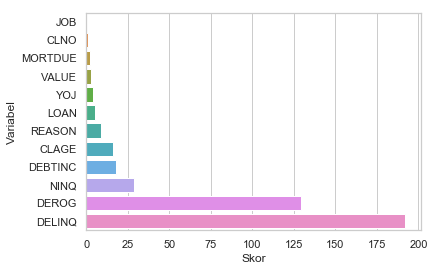

In [51]:
fs=pd.DataFrame([])
fs['Variabel']=list(X)
fs['Skor']=scores.astype(int)
sns.set(style="whitegrid")
fs=fs.sort_values('Skor')
fsx = sns.barplot(x="Skor", y="Variabel", data=fs)
plt.show()

In [52]:
#feature selection (mengambil 5 variabel terpenting)
X = df.drop(columns=['BAD'])
y = df[['BAD']]
selector = SelectKBest(chi2, k=5).fit(X,y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'DEBTINC'], dtype='object')


In [53]:
#Pembuatan model baru
df=df[['DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'DEBTINC', 'BAD']]
df.head()

,DEROG,DELINQ,CLAGE,NINQ,DEBTINC,BAD
0,0.000000,0.000000,0.219597,0.166667,0.598480,1.0
1,0.000000,0.666667,0.283859,0.000000,0.598480,1.0
2,0.000000,0.000000,0.348511,0.166667,0.598480,1.0
3,0.353902,0.409728,0.350204,0.297127,0.598480,1.0
4,0.000000,0.000000,0.217180,0.000000,0.466105,0.0


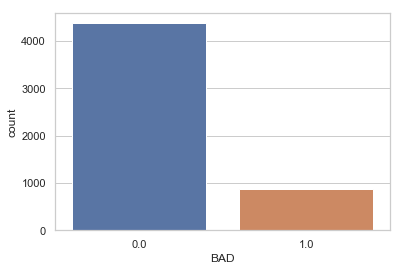

In [54]:
sns.set(style="whitegrid")
yx = sns.countplot(x="BAD", data=y)
plt.show()

# Regresi Logistik

In [55]:
y=y.values
X=X.values

In [56]:
n=5
kf=StratifiedKFold(n_splits=n,random_state=None)

In [57]:
clf = LogisticRegression(random_state=0, solver='lbfgs')

In [58]:
cm=[]
total=[]
ac=[]
se=[]
sp=[]

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

0.8619060585993689
0.30768719686399576
0.9716670580560992
    Akurasi  Sensitivitas  Spesifisitas
0  0.873333      0.956621      0.454023
1  0.865586      0.958857      0.396552
2  0.856870      0.965714      0.306358
3  0.870229      0.978286      0.323699
4  0.843511      0.998857      0.057803


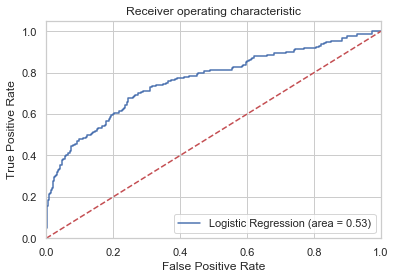

In [59]:
for train_index, test_index in kf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cm.append((confusion_matrix(y_test, y_pred)).astype(float))
for j in range (n):
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))
    logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
akurasi=np.mean(ac)
spesifisiti=np.mean(sp)
sensitiviti=np.mean(se)
afpr=np.mean(fpr)
atpr=np.mean(tpr)
athresold=np.mean(thresholds)

print(akurasi)
print(spesifisiti)
print(sensitiviti)
#performansi masing masing fold->csv
df_k3=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(se[i])
    test[2].append(sp[i])
for i in range (3):
    df_k3=pd.concat([df_k3,pd.DataFrame(test[i])],axis=1)
df_k3.columns=['Akurasi','Sensitivitas','Spesifisitas']
print(df_k3)

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Pengolahan K-Fold

# 1. Random Forest

In [60]:
n=5
kf=StratifiedKFold(n_splits=n,random_state=None)

In [61]:
clf_rf = RandomForestClassifier()
cm=[]
total=[]
ac=[]
se=[]
sp=[]

In [62]:
for train_index, test_index in kf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf_rf.fit(X_train, y_train)
    y_pred = clf_rf.predict(X_test)
    cm.append((confusion_matrix(y_test, y_pred)).astype(float))
for j in range (n):
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))

akurasi=np.mean(ac)
spesifisiti=np.mean(sp)
sensitiviti=np.mean(se)

print(akurasi)
print(spesifisiti)
print(sensitiviti)
#performansi masing masing fold->csv
df_k3=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(se[i])
    test[2].append(sp[i])
for i in range (3):
    df_k3=pd.concat([df_k3,pd.DataFrame(test[i])],axis=1)
df_k3.columns=['Akurasi','Sensitivitas','Spesifisitas']
print(df_k3)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd

0.7938298907858794
0.7748721015214936
0.7974776255707763
    Akurasi  Sensitivitas  Spesifisitas
0  0.195238      0.035388      1.000000
1  0.940896      0.981714      0.735632
2  0.958015      0.989714      0.797688
3  0.935115      0.995429      0.630058
4  0.939885      0.985143      0.710983


# 2. Naive Bayes

In [63]:
n=5
kf=StratifiedKFold(n_splits=n,random_state=None)
gnb = GaussianNB()

In [64]:
cm=[]
total=[]
ac=[]
se=[]
sp=[]

In [65]:
for train_index, test_index in kf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    cm.append((confusion_matrix(y_test, y_pred)).astype(float))
for j in range (n):
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))

akurasi=np.mean(ac)
spesifisiti=np.mean(sp)
sensitiviti=np.mean(se)
afpr=np.mean(fpr)
atpr=np.mean(tpr)
athresold=np.mean(thresholds)

print(akurasi)
print(spesifisiti)
print(sensitiviti)
#performansi masing masing fold->csv
df_k3=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(se[i])
    test[2].append(sp[i])
for i in range (3):
    df_k3=pd.concat([df_k3,pd.DataFrame(test[i])],axis=1)
df_k3.columns=['Akurasi','Sensitivitas','Spesifisitas']
print(df_k3)

0.8434104270602354
0.4300511593914026
0.9252774951076322
    Akurasi  Sensitivitas  Spesifisitas
0  0.849524      0.910959      0.540230
1  0.830315      0.902857      0.465517
2  0.840649      0.918857      0.445087
3  0.862595      0.934857      0.497110
4  0.833969      0.958857      0.202312


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

# 3. SVM

In [66]:
from sklearn.model_selection import StratifiedKFold,GridSearchCV
from sklearn.svm import NuSVC
from sklearn import svm
n=5
kf=StratifiedKFold(n_splits=n,random_state=None)

In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.6)
X=x_test
y=y_test
ss=svm.SVC(kernel='linear',gamma=1)
ss

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [68]:
cm=[]
total=[]
ac=[]
se=[]
sp=[]

In [69]:
for train_index, test_index in kf.split(X,y):
    X_train, X_test=X[train_index],X[test_index]
    y_train, y_test=y[train_index],y[test_index]
    ss.fit(X_train, y_train)
    y_pred=ss.predict(X_test)
    cm.append((confusion_matrix(y_test,y_pred)).astype(float))
for j in range(n):
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,1]+cm[j][1,0]))
akurasi=np.mean(ac)
spesifisiti=np.mean(sp)
sensitiviti=np.mean(se)

print(akurasi)
print(spesifisiti)
print(sensitiviti)
#performansi masing masing fold->csv
df_k3=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(se[i])
    test[2].append(sp[i])
for i in range (3):
    df_k3=pd.concat([df_k3,pd.DataFrame(test[i])],axis=1)
df_k3.columns=['Akurasi','Sensitivitas','Spesifisitas']
print(df_k3)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

0.8429703771105045
0.1268283917340521
0.9873936333250624
    Akurasi  Sensitivitas  Spesifisitas
0  0.850794      0.998092      0.122642
1  0.834921      0.971374      0.160377
2  0.850794      0.996183      0.132075
3  0.845541      0.990440      0.123810
4  0.832803      0.980880      0.095238


# 4. KNN

In [73]:
from sklearn.neighbors import KNeighborsClassifier
cm=[]
total=[]
ac=[]
se=[]
sp=[]

In [74]:
for train_index, test_index in kf.split(X,y):
    X_train, X_test=X[train_index],X[test_index]
    y_train, y_test=y[train_index],y[test_index]
    knn3=KNeighborsClassifier(n_neighbors=3,metric='l1')
    knn3.fit(X_test,y_test)
    knn3.kneighbors(X_test,return_distance=False)
    y_pred_knn3=knn3.predict(X_test)
    cm.append((confusion_matrix(y_test,y_pred_knn3)).astype(float))
for j in range(n):
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,1]+cm[j][1,0]))
akurasi=np.mean(ac)
Sensitifitas=np.mean(se)
Spesifisitas=np.mean(sp)
print(akurasi)
print(Sensitifitas)
print(Spesifisitas)
#performansi masing-masing fold->csv
df_k1=pd.DataFrame()
test=dict()
for j in range(3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k1=pd.concat([df_k1, pd.DataFrame(test[i])],axis=1)
df_k1.columns=['Akurasi','Spesifisitas','Sensitifitas']
df_k1

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


0.9167323829744213
0.9904536365361318
0.5512848158131177


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


,Akurasi,Spesifisitas,Sensitifitas
0,0.920635,0.575472,0.990458
1,0.907937,0.537736,0.982824
2,0.901587,0.462264,0.990458
3,0.928344,0.600000,0.994264
4,0.925159,0.580952,0.994264


# Pengolahan Holdout

# 1. Naive Bayes

In [58]:
X = df.drop(columns=['BAD'])
y = df[['BAD']]
y=y.values
X=X.values

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn import svm
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np

In [60]:
#split data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [61]:
from sklearn.naive_bayes import BernoulliNB
brn = BernoulliNB()
y_pred=brn.fit(X_test,y_test).predict(X_test)
print("Number of mislabeled points out of a total %d points:%d"%(X_test.shape[0],(y_test !=y_pred).sum()))
print(y_pred)

Number of mislabeled points out of a total 1573 points:428885
[0. 0. 0. ... 0. 0. 0.]


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [62]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8264462809917356

In [63]:
a1=confusion_matrix(y_test,y_pred)
print(a1)

[[1300    1]
 [ 272    0]]


In [64]:
spesifisitas=(a1[1,1]/(a1[1,1]+a1[1,0]))
spesifisitas

0.0

In [65]:
sensitivitas=(a1[0,0]/(a1[0,0]+a1[0,1]))
sensitivitas

0.9992313604919293

# 2. SVM

In [68]:
X = df.drop(columns=['BAD'])
y = df[['BAD']]
y=y.values
X=X.values

In [71]:
from sklearn import svm
svm=svm.SVC(class_weight=None,C=0.0001, gamma=0.1, kernel='linear', random_state=100)
svm.fit(X_test,y_test)a1=confusion_matrix(y_test,y_pred)
print(a1)
y_pred=svm.predict(X_test)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [73]:
a1=confusion_matrix(y_test,y_pred)
print(a1)

[[1301    0]
 [ 272    0]]


In [74]:
akurasi=accuracy_score(y_test,y_pred)
akurasi

0.8270820089001907

In [75]:
spesifisitas=(a1[1,1]/(a1[1,1]+a1[1,0]))
spesifisitas

0.0

In [76]:
sensitivitas=(a1[0,0]/(a1[0,0]+a1[0,1]))
sensitivitas

1.0

# 3. KNN

In [76]:
X = df.drop(columns=['BAD'])
y = df[['BAD']]
y=y.values
X=X.values
from sklearn.model_selection import train_test_split

In [79]:
#split data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
knn3 = KNeighborsClassifier(n_neighbors=3,metric='l1')
knn3.fit(X_test,y_test)
knn3.kneighbors(X_test,return_distance=False)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


array([[   0, 1223,  418],
       [   1,  845,  392],
       [   2,  873,  603],
       ...,
       [1570, 1081,  701],
       [1571,  230, 1085],
       [1572,  790,  652]], dtype=int64)

In [80]:
y_pred_knn3=knn3.predict(X_test)
y_pred_knn3

array([0., 1., 0., ..., 0., 0., 1.])

In [82]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, auc, roc_curve
accuracy_score(y_test,y_pred_knn3)

0.9256198347107438

In [83]:
a1=confusion_matrix(y_test,y_pred_knn3)
print(a1)

[[1278   40]
 [  77  178]]


In [84]:
spesificity=(a1[1,1]/(a1[1,1]+a1[1,0]))
spesificity

0.6980392156862745

In [85]:
sensitivity=(a1[0,0]/(a1[0,0]+a1[0,1]))
sensitivity

0.9696509863429439